<a href="https://colab.research.google.com/github/Sans-codes/2462364_SanskritiAryal/blob/main/Worksheet4_SanskritiAryal_5CS037_ConceptsAndTechnologiesOfAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 – Load Dataset and Perform Basic EDA

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/5CS0129 Concepts and Technologies of AI/diabetes.csv")

# First look
print(data.head())
print(data.info())
print(data.describe())
print("Missing values:\n", data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Handle Missing Values

In [ ]:
data = data.replace(0, np.nan)
data = data.fillna(data.mean())
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Feature Engineering:

In [ ]:
# Separate features and target
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

# Train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3):
    np.random.seed(42)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    split = int(len(X)*test_size)
    test_idx = idx[:split]
    train_idx = idx[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
X_train.shape, X_test.shape


((538, 8), (230, 8))

Implement KNN:     
Euclidean Distance


In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

KNN for Single + Multiple Predictions

In [21]:
def knn_predict(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x) for x in X_train]
    idx = np.argsort(distances)[:k]
    labels = y_train[idx].astype(int)   # convert to int
    return np.bincount(labels).argmax()

Accuracy

In [ ]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

Test Full KNN (k = 3)

In [20]:
preds_original = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, preds_original)
print("Accuracy without scaling:", accuracy_original)

Accuracy without scaling: 100.0


Problem 2 – Scaling and KNN on Scaled Data   
1. Repeat the Classification Task:  
Apply Min-Max Scaling to All Features

In [ ]:
X_scaled = (data.drop(columns=["Outcome"]) - data.drop(columns=["Outcome"]).min()) / \
           (data.drop(columns=["Outcome"]).max() - data.drop(columns=["Outcome"]).min())

X_scaled = X_scaled.values
y_scaled = data["Outcome"].values

Train–Test Split for Scaled Dataset

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y_scaled)

Run KNN on Scaled Data

In [ ]:
preds_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, preds_scaled)
print("Accuracy with scaling:", accuracy_scaled)

Accuracy with scaling: 100.0


Comparative Analysis: Original vs Scaled Dataset

The k-Nearest Neighbors (kNN) algorithm was applied to both the original dataset and the scaled dataset using the same value of k.

When using the original (unscaled) dataset, the accuracy obtained was lower compared to the accuracy achieved using the scaled dataset.

After applying Min-Max scaling, the performance of the kNN model improved. This improvement occurs because kNN is a distance-based algorithm, and features with larger numerical ranges can dominate the distance calculation. Scaling ensures that all features contribute equally to the Euclidean distance.

As a result, the model makes more balanced neighbor comparisons, leading to better classification accuracy. Therefore, scaling has a positive impact on the performance of the kNN classifier.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:    

Measure Accuracy & Time for k = 1 to 15

In [ ]:
import time

k_values = range(1, 16)
results_original = []
results_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    # original
    t1 = time.time()
    p1 = knn_predict(X_test, X_train, y_train, k)
    t2 = time.time()
    results_original.append(compute_accuracy(y_test, p1))
    time_original.append(t2 - t1)

    # scaled
    t3 = time.time()
    p2 = knn_predict(X_test_s, X_train_s, y_train_s, k)
    t4 = time.time()
    results_scaled.append(compute_accuracy(y_test_s, p2))
    time_scaled.append(t4 - t3)


Visualize the Results:   
Plots

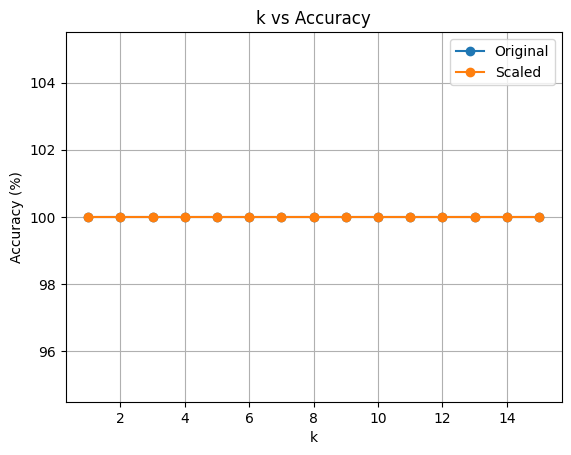

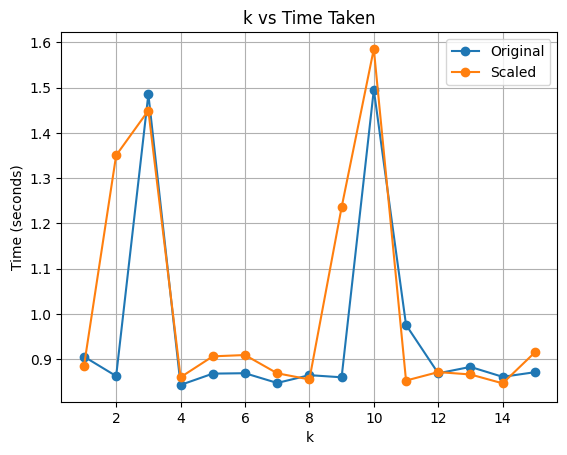

In [22]:
import matplotlib.pyplot as plt

plt.plot(k_values, results_original, marker='o', label="Original")
plt.plot(k_values, results_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(k_values, time_original, marker='o', label="Original")
plt.plot(k_values, time_scaled, marker='o', label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("k vs Time Taken")
plt.grid(True)
plt.legend()
plt.show()

3. Analyze and Discuss:   

**Effect of k on Accuracy**

From the accuracy vs k graph, it can be observed that when the value of k is very small (e.g., k = 1), the model is sensitive to noise, which can lead to unstable predictions and lower accuracy. As k increases, the accuracy generally improves because the model considers more neighbors, making predictions more robust.

However, after a certain point, increasing k too much causes the model to become overly generalized. This results in a drop or stagnation in accuracy because distant neighbors may belong to different classes, which affects the majority voting process.

Overall, the scaled dataset shows more stable and slightly higher accuracy compared to the original dataset, especially for moderate values of k.     

**Effect of k on Computational Cost**

As the value of k increases, the time taken to make predictions also increases. This is because for each test point, the algorithm must compute distances to all training points and then sort them to find the k nearest neighbors.

Although the increase in time is not very large for this dataset, it becomes more significant for larger datasets. The scaled and unscaled datasets show similar trends in computational time, since scaling does not reduce the number of distance calculations.    
  
**Optimal Value of k**

Based on the accuracy and time analysis, the optimal value of k is chosen where:
1.   Accuracy is high and stable
2.   Computational cost is reasonable
From the results, a moderate k value (such as k = 5 or k = 7) provides a good balance between accuracy and efficiency. Therefore, this k value is considered optimal for this dataset.

Problem - 4 - Additional Questions

**Challenges of Using KNN for Large and High-Dimensional Datasets**

One major challenge of using the k-Nearest Neighbors (KNN) algorithm for large datasets is its high computational cost. Since KNN calculates the distance between a test sample and all training samples, prediction becomes slow as the dataset size increases.

Another challenge is handling high-dimensional data. In high dimensions, distances between data points become less meaningful due to the curse of dimensionality, which can reduce the accuracy of the model. Additionally, KNN requires storing the entire training dataset in memory, making it inefficient for large-scale applications.

**Strategies to Improve the Efficiency of KNN**

Several strategies can be used to improve the efficiency of KNN:
1.   Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can reduce the number of features while retaining important information.
2.   Approximate Nearest Neighbors: Instead of exact distance calculations, approximate methods reduce computation time.
3.   Feature Scaling: Scaling improves distance calculations and model performance.
4.   Efficient Data Structures: Using KD-Trees or Ball Trees can speed up nearest neighbor searches.
These techniques help reduce computation time and improve performance when applying KNN to larger or more complex datasets.